In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *
from scipy.stats import pearsonr 

In [2]:
data=pd.read_excel(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\monthly_case_series\coviddata_aug.xlsx")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-08-01,55117,1752185,51368,1146906,854,37420
1,2020-08-02,52672,1804857,40355,1187261,760,38180
2,2020-08-03,50488,1855345,43070,1230331,806,38986
3,2020-08-04,51282,1906627,51220,1281551,849,39835
4,2020-08-05,56626,1963253,45583,1327134,919,40754


In [3]:
def chk_dirt(dt):
    drt_cnt=0
    if(len(dt.columns)):
        for i in list(dt.columns):
            if((True== "NaN" in dt[i])or (True == "" in dt[i]) or (True == " " in dt[i]) or (True == "?" in  dt[i])or (True == "####" in dt[i])):
                drt_cnt+=1
        if(drt_cnt):
            print("Unwanted Data Value Found")
    else:
        print("No Columns available to deal with or columns mixed with rows")

chk_dirt(data)

In [4]:
data[data.duplicated()]

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [5]:
data.dtypes

Date               datetime64[ns]
Daily Confirmed             int64
Total Confirmed             int64
Daily Recovered             int64
Total Recovered             int64
Daily Deceased              int64
Total Deceased              int64
dtype: object

In [6]:
data.ndim

2

In [7]:
data.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,31.000000,3.100000e+01,31.000000,3.100000e+01,31.000000,31.000000
mean,64222.096774,2.667769e+06,56188.129032,1.945041e+06,931.580645,51160.064516
std,8104.978833,5.861168e+05,6567.942406,5.189621e+05,82.700574,8614.840880
min,50488.000000,1.752185e+06,40355.000000,1.146906e+06,760.000000,37420.000000
25%,58896.000000,2.183092e+06,51751.500000,1.507034e+06,864.500000,43970.500000
50%,64141.000000,2.647318e+06,56920.000000,1.918069e+06,943.000000,51048.000000
75%,68897.500000,3.135047e+06,60438.500000,2.369942e+06,985.000000,58131.000000
max,79461.000000,3.687953e+06,66305.000000,2.837370e+06,1099.000000,65445.000000


In [8]:
###beginning the task of analysis(visually and quantitatively )

In [9]:
pcol=['Daily Confirmed','Daily Recovered','Daily Deceased']
tcol=['Total Confirmed','Total Recovered','Total Deceased']

In [10]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            a=len(data)*(np.sum(data[pcol[j]]*data[pcol[k]]))
            b=np.sum(data[pcol[j]])
            c=np.sum(data[pcol[k]])
            d=len(data)*np.sum(data[pcol[j]]**2)
            e=b**2
            f=len(data)*np.sum(data[pcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(pcol[j])
            if(k!=3):
                print(pcol[k])
            else:
                print(pcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(data)*(np.sum(data[pcol[i]]*data[pcol[i+1]]))
        b=np.sum(data[pcol[i]])
        c=np.sum(data[pcol[i+1]])
        d=len(data)*np.sum(data[pcol[i]]**2)
        e=b**2
        f=len(data)*np.sum(data[pcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(pcol[i])
        print(pcol[i+1])
        print(r)
        
            

Daily Confirmed
Daily Recovered
-1.3599134238967868e-08
Daily Confirmed
Daily Deceased
9.64078121198258e-10
Daily Recovered
Daily Deceased
9.309703068962342e-10


<ipython-input-10-e405aa859196>:13: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))


In [11]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            coef,pval=pearsonr(data[pcol[j]],data[pcol[k]])
            print(pcol[j]+" Vs."+pcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(data[pcol[i]],data[pcol[i+1]])
        print(pcol[i]+" Vs."+pcol[i+1])
        print(coef)
        print(pval)

Daily Confirmed Vs.Daily Recovered
0.6871326583254977
1.9580460169914312e-05
Daily Confirmed Vs.Daily Deceased
0.6009738633295412
0.0003500420010940505
Daily Recovered Vs.Daily Deceased
0.4702801390322503
0.007591539333982903


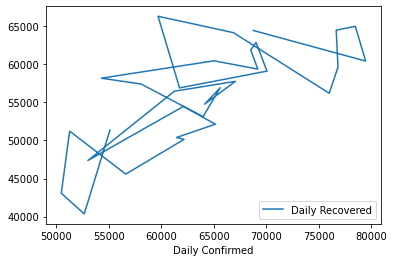

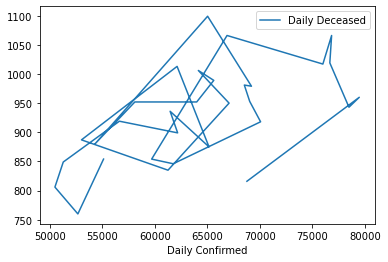

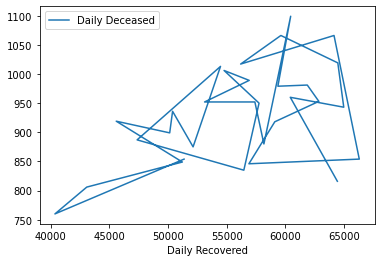

In [12]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            data.plot(x=pcol[j],y=pcol[k])
            k=k+1
    else:
        data.plot(x=pcol[i],y=pcol[i+1])

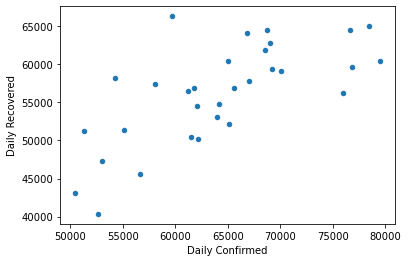

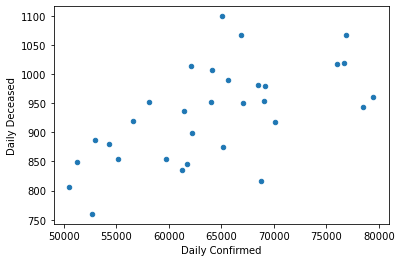

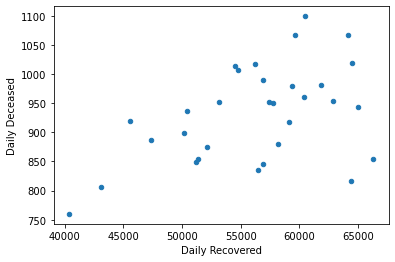

In [13]:
for i in range(len(pcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(pcol)):
            data.plot(x=pcol[j],y=pcol[k],kind="scatter")
            k=k+1
    else:
        data.plot(x=pcol[i],y=pcol[i+1],kind="scatter")

In [14]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            a=len(data)*(np.sum(data[tcol[j]]*data[tcol[k]]))
            b=np.sum(data[tcol[j]])
            c=np.sum(data[tcol[k]])
            d=len(data)*np.sum(data[tcol[j]]**2)
            e=b**2
            f=len(data)*np.sum(data[tcol[k]]**2)
            g=c**2
            r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
            
            print(tcol[j])
            if(k!=3):
                print(tcol[k])
            else:
                print(tcol[k-2])
                
            print(r)
            k=k+1
    else:
        a=len(data)*(np.sum(data[tcol[i]]*data[tcol[i+1]]))
        b=np.sum(data[tcol[i]])
        c=np.sum(data[tcol[i+1]])
        d=len(data)*np.sum(data[tcol[i]]**2)
        e=b**2
        f=len(data)*np.sum(data[tcol[i+1]]**2)
        g=c**2
        k=j+2
        r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
        print(tcol[i])
        print(tcol[i+1])
        print(r)
        
            

Total Confirmed
Total Recovered
-8.955002935456229e-05
Total Confirmed
Total Deceased
5.854465191131371e-07
Total Recovered
Total Deceased
2.2567633193777697e-06


<ipython-input-14-2344589cd845>:13: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))
<ipython-input-14-2344589cd845>:32: RuntimeWarning: overflow encountered in longlong_scalars
  r=((a)-(b*c))/(((d)-(e))*((f)-(g)))


In [15]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            coef,pval=pearsonr(data[tcol[j]],data[tcol[k]])
            print(tcol[j]+" Vs."+tcol[k])
            print(coef)
            print(pval)
            k=k+1
    else:
        coef,pval=pearsonr(data[tcol[i]],data[tcol[i+1]])
        print(tcol[i]+" Vs."+tcol[i+1])
        print(coef)
        print(pval)

Total Confirmed Vs.Total Recovered
0.9998348651035702
4.899405591808976e-52
Total Confirmed Vs.Total Deceased
0.9995784650305876
3.89819926642938e-46
Total Recovered Vs.Total Deceased
0.9995417780426854
1.3070029837987694e-45


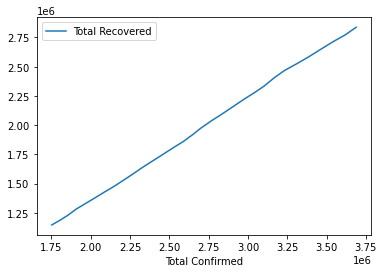

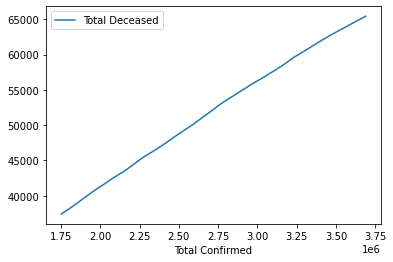

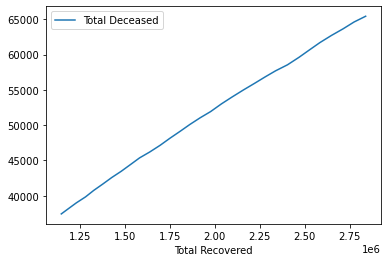

In [16]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            data.plot(x=tcol[j],y=tcol[k])
            k=k+1
    else:
        data.plot(x=tcol[i],y=tcol[i+1])

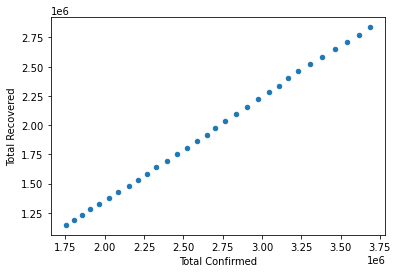

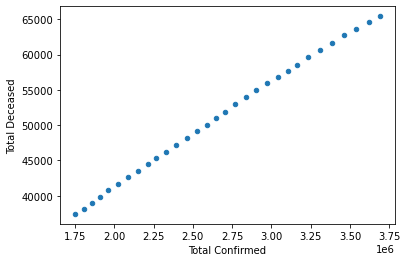

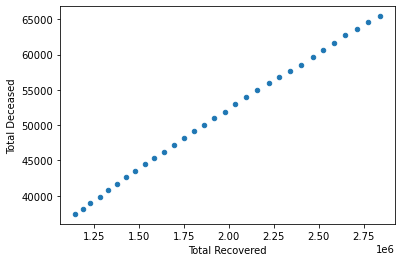

In [17]:
for i in range(len(tcol)-1):
    if(i==0):
        j=i
        k=1
        while(k<len(tcol)):
            data.plot(x=tcol[j],y=tcol[k],kind="scatter")
            k=k+1
    else:
        data.plot(x=tcol[i],y=tcol[i+1],kind="scatter")

In [18]:
colls=list(data.columns)
colls.pop(0)
for c in colls:
    min(data[c])
    max(data[c])
    rnge_list=[]
    dys_cnt={}
    
    for i in range(1,len(str(max(data[c])))):
        rnge_list.append(10**i)
    cnt1=0

    for i in list(data[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

    if(len(list(dys_cnt.keys()))>1):
        itr_lst=list(range(1,len(list(dys_cnt.keys()))))
        itr_lst.sort(reverse=True)
        for i in itr_lst:
            dys_cnt[list(dys_cnt.keys())[i]]=dys_cnt[list(dys_cnt.keys())[i]]-dys_cnt[list(dys_cnt.keys())[i-1]]        

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    

For: Daily Confirmed
   10000
0     31


For: Total Confirmed
   1000000
0       31


For: Daily Recovered
   10000
0     31


For: Total Recovered
   1000000
0       31


For: Daily Deceased
   100  1000
0   31    -3


For: Total Deceased
   10000
0     31




In [19]:
colls=list(data.columns)
colls.pop(0)
for c in colls:
    min(data[c])
    max(data[c])
    rnge_list=[]
    dys_cnt={}

    for i in range(1,len(str(max(data[c])))):
        rnge_list.append(10**i)
    cnt1=0


    for i in list(data[c]):

        if(len(str(i))<2 or len(str(i))==2):
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[0]):cnt1})
        else:
            cnt1=cnt1+1
            dys_cnt.update({str(rnge_list[len(str(i))-2]):cnt1})

            

    print("For: "+c)
    print(pd.DataFrame(dys_cnt,index=[0]))
    print("\n")
    

For: Daily Confirmed
   10000
0     31


For: Total Confirmed
   1000000
0       31


For: Daily Recovered
   10000
0     31


For: Total Recovered
   1000000
0       31


For: Daily Deceased
   100  1000
0   31    28


For: Total Deceased
   10000
0     31


